In [1]:
!pip install kagglehub[pandas-datasets]

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rtatman/speech-accent-archive")

print("Path to dataset files:", path)

100%|██████████| 865M/865M [00:08<00:00, 102MB/s]  

Extracting files...


Path to dataset files: /home/e45ca020-d85c-4550-acd9-08400b2bd19d/.cache/kagglehub/datasets/rtatman/speech-accent-archive/versions/2


In [2]:
import os
import pandas as pd

# The file path you provided
file_path = "/home/e45ca020-d85c-4550-acd9-08400b2bd19d/.cache/kagglehub/datasets/rtatman/speech-accent-archive/versions/2"

# List all files in the directory
files = os.listdir(file_path)
print("Files in the directory:")
print(files)

Files in the directory:
['speakers_all.csv', 'reading-passage.txt', 'recordings']


In [3]:
# Load the CSV file
data = pd.read_csv(f'{file_path}/speakers_all.csv')

# Find the row(s) where the speaker ID matches
rows = data[data['speakerid'] == 1864]
data.loc[rows.index[0], 'sex'] = 'female'    

# Display the first few rows
print(data.head(100))

     age  age_onset              birthplace  filename native_language     sex  \
0   24.0       12.0         koussi, senegal   balanta         balanta    male   
1   18.0       10.0          buea, cameroon  cameroon        cameroon    male   
2   48.0        8.0  hong, adamawa, nigeria  fulfulde        fulfulde    male   
3   42.0       42.0   port-au-prince, haiti   haitian         haitian    male   
4   40.0       35.0   port-au-prince, haiti   haitian         haitian    male   
..   ...        ...                     ...       ...             ...     ...   
95  24.0        9.0             doha, qatar   arabic3          arabic    male   
96  19.0        8.0    riyadh, saudi arabia  arabic30          arabic  female   
97  47.0       12.0           baghdad, iraq  arabic31          arabic  female   
98  42.0       12.0           baghdad, iraq  arabic32          arabic    male   
99  28.0       11.0           baghdad, iraq  arabic33          arabic  female   

    speakerid       country

In [4]:
import os

# List the files in the extracted directory
audio_files = os.listdir(f'{file_path}/recordings/recordings')
print(audio_files[:10])  # Show the first 10 files to get a sense


['english505.mp3', 'dutch43.mp3', 'english301.mp3', 'english142.mp3', 'french27.mp3', 'spanish109.mp3', 'korean15.mp3', 'dutch6.mp3', 'latvian3.mp3', 'french39.mp3']


In [5]:
with open(f'{file_path}/reading-passage.txt', 'r') as file:
    passage = file.read()
    print(passage)

Please call Stella.  Ask her to bring these things with her from the store:  Six spoons of fresh snow peas, five thick slabs of blue cheese, and maybe a snack for her brother Bob.  We also need a small plastic snake and a big toy frog for the kids.  She can scoop these things into three red bags, and we will go meet her Wednesday at the train station.



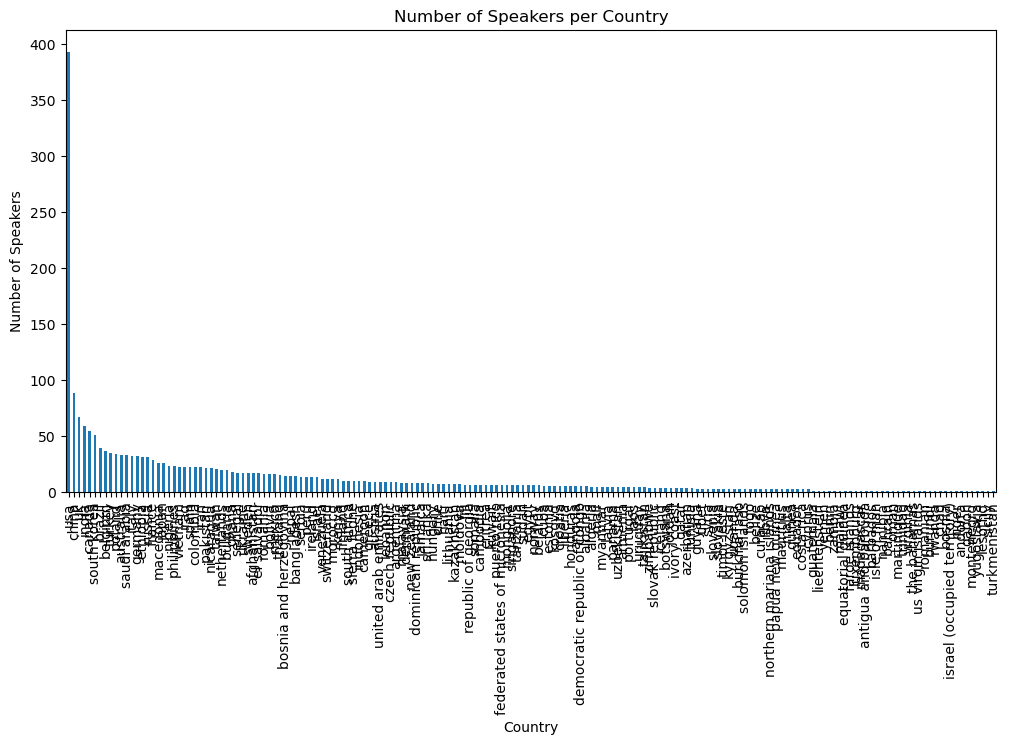

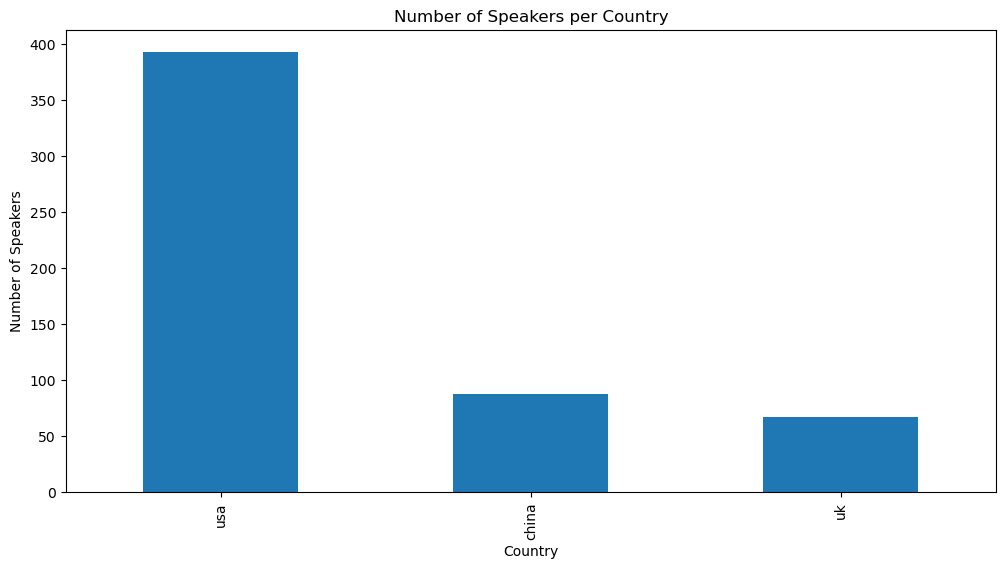

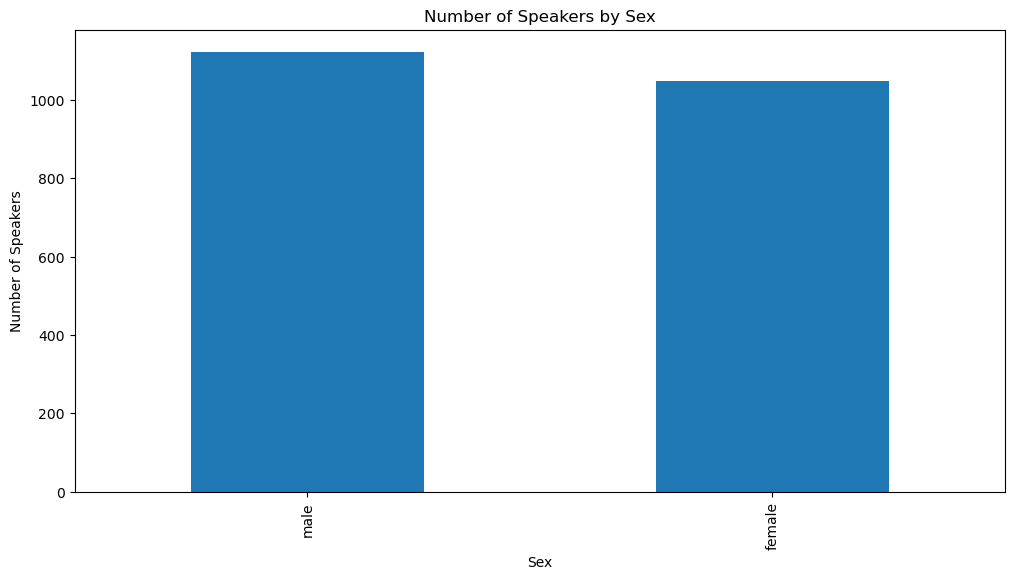

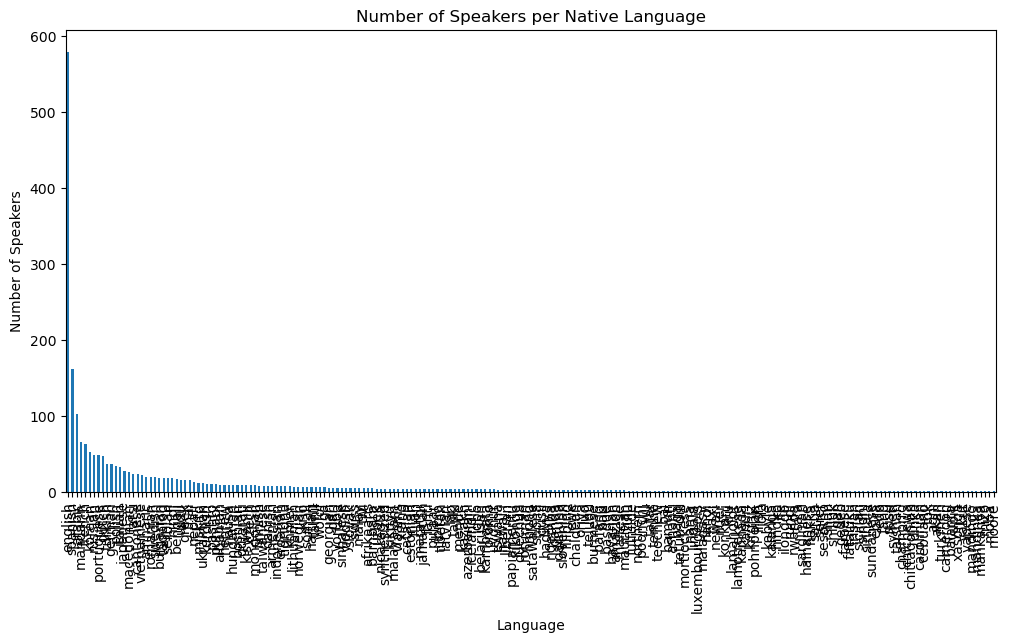

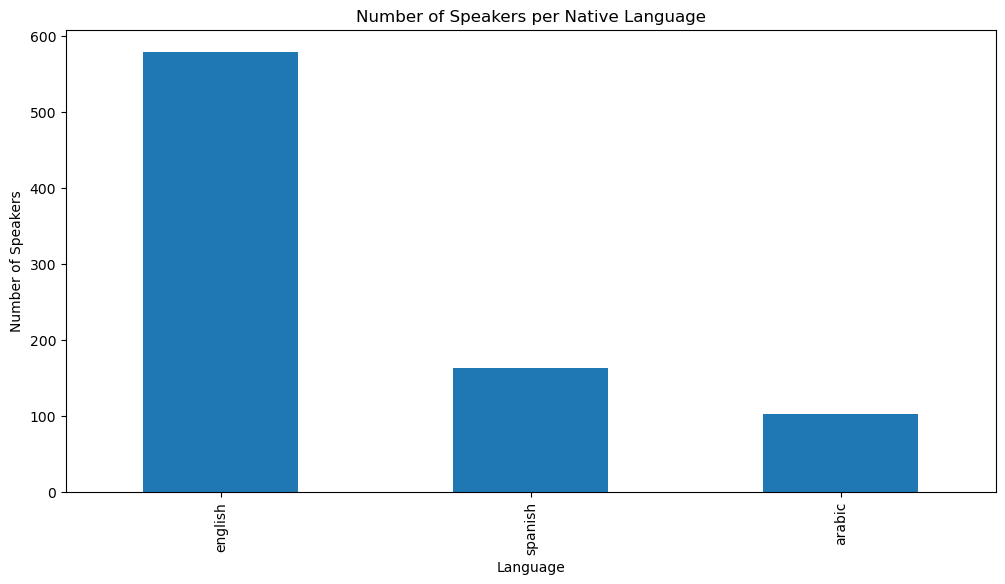

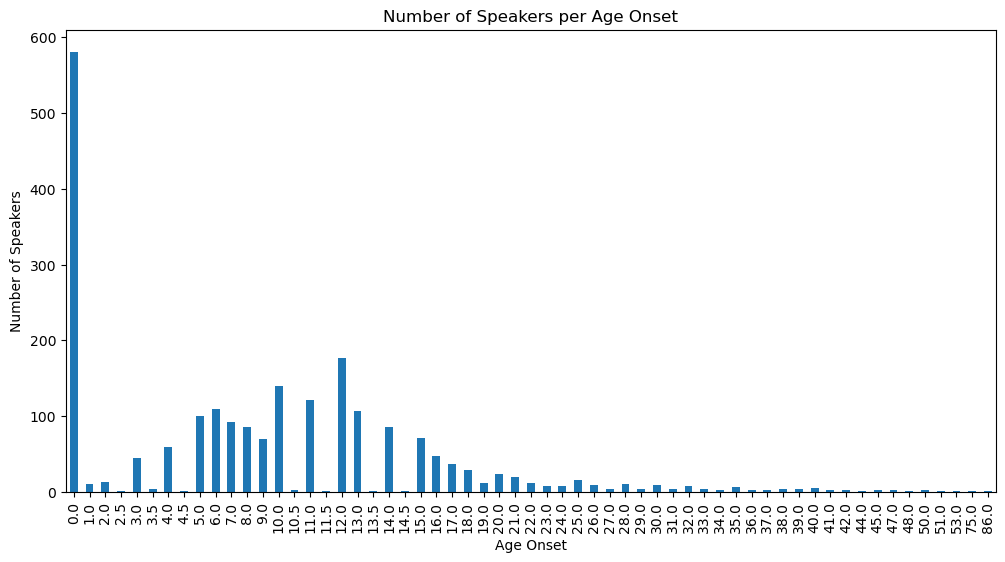

In [6]:
import matplotlib.pyplot as plt

# Plot the number of speakers per country
country_counts = data['country'].value_counts()
country_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Number of Speakers per Country')
plt.xlabel('Country')
plt.ylabel('Number of Speakers')
plt.show()

first_three_indices = country_counts.index[:3]
first_three_counts = country_counts[first_three_indices]
first_three_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Number of Speakers per Country')
plt.xlabel('Country')
plt.ylabel('Number of Speakers')
plt.show()

# Plot the number of speakers male vs female
sex_counts = data['sex'].value_counts()
sex_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Number of Speakers by Sex')
plt.xlabel('Sex')
plt.ylabel('Number of Speakers')
plt.show()

# Plot the number of speakers per native language
language_counts = data['native_language'].value_counts()
language_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Number of Speakers per Native Language')
plt.xlabel('Language')
plt.ylabel('Number of Speakers')
plt.show()

first_three_indices = language_counts.index[:3]
first_three_counts = language_counts[first_three_indices]
first_three_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Number of Speakers per Native Language')
plt.xlabel('Language')
plt.ylabel('Number of Speakers')
plt.show()

# Plot the number of speakers per age onset
age_counts = data['age_onset'].value_counts().sort_index()
age_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Number of Speakers per Age Onset')
plt.xlabel('Age Onset')
plt.ylabel('Number of Speakers')
plt.show()

In [7]:
!pip install librosa

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


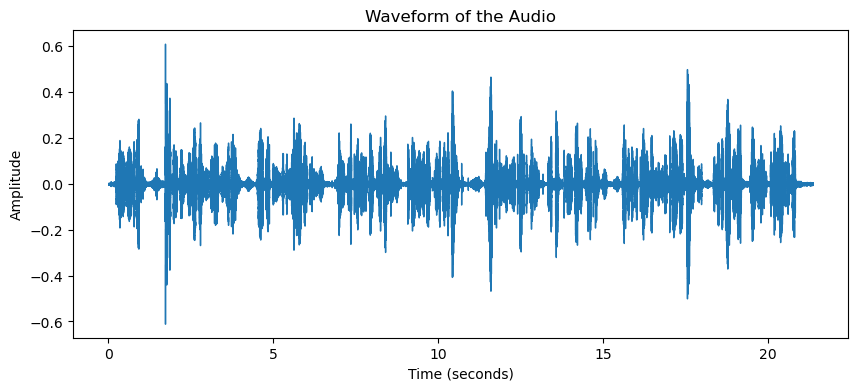

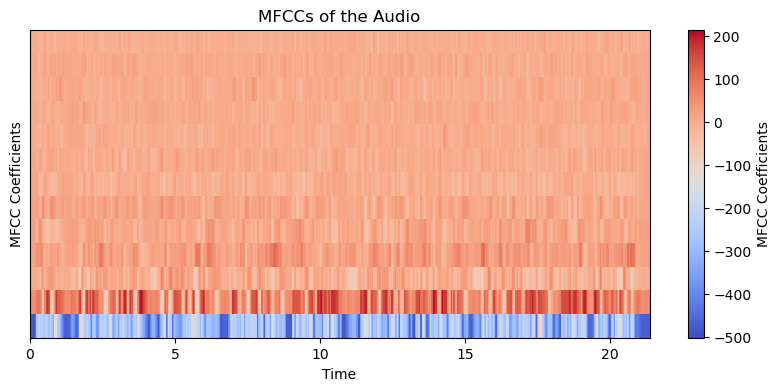

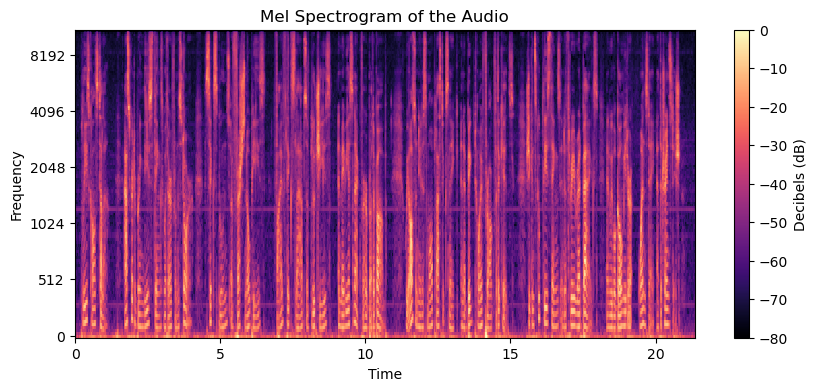

In [8]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import os

audio_path = f'{file_path}/recordings/recordings/english168.mp3'
y, sr = librosa.load(audio_path, sr=22050)  # Load the audio with a sample rate of 22.05 kHz

# Plot the waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform of the Audio")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # Extract 13 MFCC coefficients
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis="time", sr=sr)
plt.colorbar(label="MFCC Coefficients")
plt.title("MFCCs of the Audio")
plt.xlabel("Time")
plt.ylabel("MFCC Coefficients")
plt.show()

mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)  # Convert to dB scale

plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spec_db, x_axis="time", y_axis="mel", sr=sr)
plt.colorbar(label="Decibels (dB)")
plt.title("Mel Spectrogram of the Audio")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

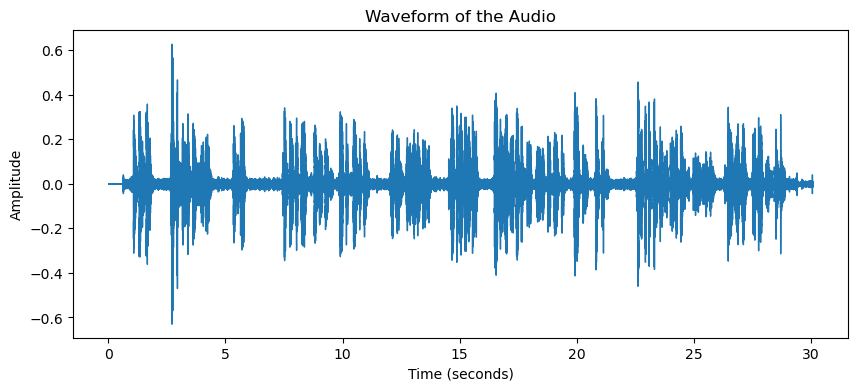

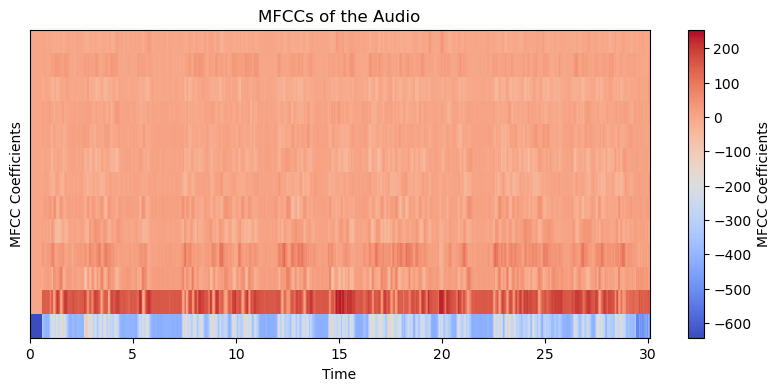

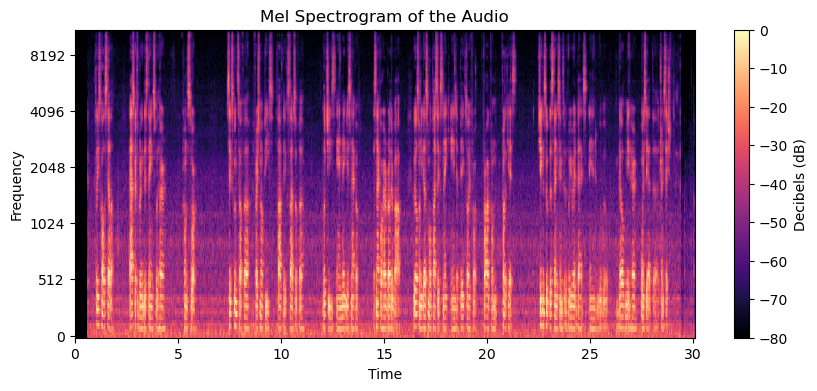

In [9]:
audio_path = f'{file_path}/recordings/recordings/amharic14.mp3'
y, sr = librosa.load(audio_path, sr=22050)  # Load the audio with a sample rate of 22.05 kHz

# Plot the waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform of the Audio")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # Extract 13 MFCC coefficients
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis="time", sr=sr)
plt.colorbar(label="MFCC Coefficients")
plt.title("MFCCs of the Audio")
plt.xlabel("Time")
plt.ylabel("MFCC Coefficients")
plt.show()

mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)  # Convert to dB scale

plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spec_db, x_axis="time", y_axis="mel", sr=sr)
plt.colorbar(label="Decibels (dB)")
plt.title("Mel Spectrogram of the Audio")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

In [10]:
import pandas as pd

def extract_features(path):
    y, sr = librosa.load(path, sr=22050)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).mean(axis=1)  # Take the mean of each coefficient
    return mfccs

features = []
name = []
country = []

audio_folder = f'{file_path}/recordings/recordings/'

for file_name in os.listdir(audio_folder):
    if file_name.endswith(".mp3"):  # Ensure it's an audio file
        temp_path = os.path.join(audio_folder, file_name)
        mfcc_features = extract_features(temp_path)
        features.append(mfcc_features)
        name.append(file_name[:-4])  # You might need to extract speaker info here
        # Find the row(s) where the speaker ID matches
        matching_rows = data[data['filename'] == file_name[:-4]]
        if not matching_rows.empty:
            country.append(matching_rows['country'].iloc[0])
        else:
            print(f"Warning: No matching row found for filename '{file_name}'")
            country.append(None)

df = pd.DataFrame(features)
df["label"] = country
df["filename"] = name
df.to_csv("mfcc_features.csv", index=False)
df = pd.read_csv("mfcc_features.csv")  

print(df.head())

           0           1          2          3          4          5  \
0 -305.31567   79.404310  13.754716  20.334076   9.835543  -5.117552   
1 -333.99814   86.311060   0.000713   6.331545  -2.831277  -6.261149   
2 -215.89516   95.110360  16.415280  38.516266  17.045510   0.869570   
3 -225.24440   74.282745  23.674494  34.301865  12.137239  15.817710   
4 -294.10788  122.909270  12.090055  44.449936 -17.965275  -0.999458   

           6          7          8          9         10         11        12  \
0 -17.615072   3.756694   2.697012  -5.398420 -10.686092  -2.448072 -3.454622   
1  -6.195013   8.277659 -18.219460 -13.898518 -15.067824 -14.677176 -7.591819   
2   1.808928  -2.415183  -6.958449   1.631612  -4.010499   4.571972 -5.664376   
3  -8.485128 -13.588648 -11.487216   1.040574  -7.329209   4.844837 -9.920634   
4  -6.519984   7.596674 -14.169602  -8.519593  -8.746984  -5.689569 -0.877301   

         label    filename  
0      lebanon  english505  
1  netherlands     dut

In [11]:
print(df.isnull().sum())

0           0
1           0
2           0
3           0
4           0
5           0
6           0
7           0
8           0
9           0
10          0
11          0
12          0
label       5
filename    0
dtype: int64


In [12]:
from sklearn.preprocessing import StandardScaler

# Separate features and labels
feature_columns = df.columns[:-2]  # All columns except the last one
label_column = df.columns[-2]  # Last column (label)

features = df[feature_columns]
labels = df[label_column]  # Keep labels separate

# Standardize the MFCC features
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

# Step 4: Convert back to DataFrame (keeping column names)
df_normalized = pd.DataFrame(normalized_features, columns=feature_columns)

# Step 5: Add the labels back to the DataFrame
df_normalized[label_column] = labels.values

# Step 6: Save to a new CSV file
df_normalized.to_csv("mfcc_features_normalized.csv", index=False)

print("MFCC features have been standardized and saved.")

MFCC features have been standardized and saved.


In [13]:
from sklearn.preprocessing import LabelEncoder

# Encode the country labels numerically
label_encoder = LabelEncoder()
df_normalized["encoded_label"] = label_encoder.fit_transform(df_normalized[label_column])

# Step 3: Drop the original label columns (if not needed)
# df_normalized.drop(columns=[label_column, "country"], inplace=True)  

print(df_normalized.head())

# Save the processed dataset
df_normalized.to_csv("mfcc_features_encoded.csv", index=False)

print("Labels have been encoded by country.")


          0         1         2         3         4         5         6  \
0 -0.067890 -0.489489  0.626071 -0.564186  0.634869 -0.436866 -0.628281   
1 -0.712544 -0.212775 -0.127334 -1.556755 -0.419974 -0.540621  0.392824   
2  1.941885  0.139763  0.771810  0.724658  1.235287  0.106330  1.108483   
3  1.731756 -0.694681  1.169449  0.425920  0.826545  1.462533  0.188057   
4  0.184011  1.253507  0.534886  1.145266 -1.680273 -0.063242  0.363767   

          7         8         9        10        11        12        label  \
0  0.905767  1.330890 -0.177245 -0.625824  0.012062  0.141847      lebanon   
1  1.407202 -1.265012 -1.350929 -1.269398 -1.929665 -0.537817  netherlands   
2  0.221224  0.132570  0.793454  0.354664  1.126699 -0.221174       canada   
3 -1.018062 -0.429486  0.711845 -0.132777  1.170024 -0.920398          usa   
4  1.331672 -0.762392 -0.608213 -0.341015 -0.502620  0.565252      algeria   

   encoded_label  
0             85  
1            108  
2             28  
3   

In [18]:
from sklearn.model_selection import train_test_split

# Reload your data
df = pd.read_csv("mfcc_features_encoded.csv")
df = df.drop(columns=["label"])

# Count how many samples per label
label_counts = df["encoded_label"].value_counts()

# Keep only labels with at least 3 samples
valid_labels = label_counts[label_counts >= 3].index
df_filtered = df[df["encoded_label"].isin(valid_labels)]

X = df_filtered.drop(columns=["encoded_label"])
y = df_filtered["encoded_label"]

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Reconstruct temp DataFrame
temp_df = X_temp.copy()
temp_df["encoded_label"] = y_temp

# Keep only classes with at least 2 in temp set
temp_counts = temp_df["encoded_label"].value_counts()
valid_temp_labels = temp_counts[temp_counts >= 2].index
temp_df_filtered = temp_df[temp_df["encoded_label"].isin(valid_temp_labels)]

# Separate again
X_temp_filtered = temp_df_filtered.drop(columns=["encoded_label"])
y_temp_filtered = temp_df_filtered["encoded_label"]

X_val, X_test, y_val, y_test = train_test_split(
    X_temp_filtered, y_temp_filtered, test_size=0.5, random_state=42, stratify=y_temp_filtered
)


In [19]:
# Merge the features and labels back together (optional but useful)
df_filtered["encoded_label"] = y  # Make sure your df_filtered has the updated label column

# Save the splits using the index from each split
df_train = df_filtered.loc[X_train.index]
df_val = df_filtered.loc[X_val.index]
df_test = df_filtered.loc[X_test.index]

# Save to CSV
df_train.to_csv("train_data.csv", index=False)
df_val.to_csv("val_data.csv", index=False)
df_test.to_csv("test_data.csv", index=False)

print("Splits saved to CSV!")


Splits saved to CSV!


/tmp/ipykernel_217/3289699811.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["encoded_label"] = y  # Make sure your df_filtered has the updated label column
